# Prediction of persons having high overtime earnings

## Problem statement

These days it is common for most organizations to pay for the extra amount to the time their empoyees spend beyond their shif hours. It is paramount importnace for employers to reduce the operating costs year by year. finding out the factors that influence the overtime, help them plan better for future expenses and also helps them in taking the necessary steps required to reduce the overtime  

## Solution

Recognizing the key factors that influence overtime earnings
Build a model which involves prediction of whether an employee work overtime based on his payroll proceessing data

## ML Approach

Clasification problem to identify whether emplyee would work overtime or not

## Intended audience

1. Finace Department
2. HR Department

## Importing standard python libraries

In [1]:
# general libraries
import io, os, sys, types, time, datetime, math, random, requests, subprocess, StringIO, tempfile

## Importing packages required for pre-processing and analysis

In [117]:
# Data Manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D

# Feature Selection and Encoding
from sklearn.feature_selection import RFE, RFECV
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

from pandas import ExcelWriter
from pandas import ExcelFile

# Machine learning
import sklearn.ensemble as ske
from sklearn import datasets, model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

from catboost import CatBoostClassifier, CatBoostRegressor, CatboostError

# test and train split
from sklearn.model_selection import train_test_split

# Data Imbalance
from imblearn.under_sampling import RandomUnderSampler, NearMiss, CondensedNearestNeighbour, OneSidedSelection,NeighbourhoodCleaningRule, TomekLinks, ClusterCentroids
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.ensemble import EasyEnsemble, BalanceCascade
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import RepeatedEditedNearestNeighbours

# Metrics
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc,confusion_matrix,log_loss

#Data Imputation
from fancyimpute import SoftImpute

# Grid and Random Search
import scipy.stats as stats
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Managing Warnings
import warnings
warnings.filterwarnings('ignore')

# Plot the Figures Inline
%matplotlib inline

## Reading the data

In [3]:
# data file
filename ="adp_hackathon_overtime.xls"

In [4]:
df = pd.read_excel(filename, sheet_name='OT_classification_insofe_withCo')
 
print("Column headings:")
print(df.columns)

Column headings:
Index([u'clnt_obj_id', u'pers_obj_id', u'mnth_cd', u'mngr_pers_obj_id',
       u'job_cd', u'work_loc_cd', u'hr_orgn_id', u'hr_annl_cmpn_amt',
       u'compa_rt', u'annual_comp_by_exp', u'annual_comp_by_tenure',
       u'exp_by_tenure', u'clnt_bm_annl_cmpn', u'full_tm_eqv_val',
       u'work_asgnmt_stus_dsc', u'full_tm_part_tm_dsc', u'reg_temp_dsc',
       u'adp_lens_cd', u'hr_cmpn_freq_dsc', u'pay_rt_type_dsc',
       u'martl_stus_dsc', u'is_manager', u'flsa_stus_dsc', u'home_addr_sta_cd',
       u'work_state_cd', u'qtrs_since_last_promotion',
       u'qtrs_since_last_job_change', u'age', u'birth_year', u'salary_hike',
       u'earnings_hike', u'tenure_months', u'tenure_in_job_months',
       u'tenure_in_cmpn_months', u'travel_distance', u'travel_duration',
       u'c_age_band_1', u'c_age_band_2', u'c_age_band_3', u'c_age_band_4',
       u'c_age_band_5', u'c_age_band_6', u'c_age_band_7', u'c_tenure_band_1',
       u'c_tenure_band_2', u'c_tenure_band_3', u'c_tenure_band

In [5]:
df.head()

,clnt_obj_id,pers_obj_id,mnth_cd,mngr_pers_obj_id,job_cd,work_loc_cd,hr_orgn_id,hr_annl_cmpn_amt,compa_rt,annual_comp_by_exp,...,c_perc_tenured,same_home_work_state,layer,direct_reports,indirect_reports,total_reports,span,regular_hours_autopay,l2_code,is_excess_ot
0,DBFCDCCBE0300BC6,01FGGJK6QR10B6MV,201406,01FGGJK6QR10B6Q5,PA0069,STIPA,402323,152250,NaN,5205.148148,...,32.15,NaN,3.0,2,21,23,NaN,136.0,NAICS_31,0
1,DBFCDCCBE0300BC6,01FGGJK6QR10B6MV,201404,01FGGJK6QR10B6Q5,PA0069,STIPA,402323,152250,NaN,5205.148148,...,32.15,NaN,3.0,2,21,23,NaN,160.0,NAICS_31,0
2,DBFCDCCBE0300BC6,01FGGJK6QR10B6MV,201405,01FGGJK6QR10B6Q5,PA0069,STIPA,402323,152250,NaN,5205.148148,...,32.15,NaN,3.0,2,21,23,NaN,160.0,NAICS_31,0
3,DBFCDCCBE0300BC6,01M8EM4F6WX188HQ,201404,01M8EM4F6WX17Y68,200549,PBDY,130901,42726,NaN,979.044444,...,32.15,NaN,2.0,0,0,0,NaN,170.4,NAICS_31,0
4,DBFCDCCBE0300BC6,01M8EM4F6WX188HQ,201406,01M8EM4F6WX17Y68,200549,PBDY,130901,42726,NaN,979.044444,...,32.15,NaN,2.0,0,0,0,NaN,145.9,NAICS_31,0


In [6]:
df.dtypes

clnt_obj_id                    object
pers_obj_id                    object
mnth_cd                         int64
mngr_pers_obj_id               object
job_cd                         object
work_loc_cd                    object
hr_orgn_id                     object
hr_annl_cmpn_amt                int64
compa_rt                      float64
annual_comp_by_exp            float64
annual_comp_by_tenure         float64
exp_by_tenure                 float64
clnt_bm_annl_cmpn             float64
full_tm_eqv_val               float64
work_asgnmt_stus_dsc           object
full_tm_part_tm_dsc            object
reg_temp_dsc                   object
adp_lens_cd                    object
hr_cmpn_freq_dsc               object
pay_rt_type_dsc                object
martl_stus_dsc                 object
is_manager                     object
flsa_stus_dsc                  object
home_addr_sta_cd               object
work_state_cd                  object
qtrs_since_last_promotion     float64
qtrs_since_l

In [7]:
print ('The train data has {0} rows and {1} columns'.format(df.shape[0],df.shape[1]))

The train data has 65535 rows and 65 columns


## Missing values analysis

In [8]:
print ('The data is missing in {1} columns out of {0} '.format(len(df.columns),len(df.columns)-len(df.columns[df.isnull().any()])))

The data is missing in 53 columns out of 65 


In [9]:
# find the column nams where data is missing
df.columns[df.isnull().any()]

Index([u'compa_rt', u'martl_stus_dsc', u'home_addr_sta_cd',
       u'qtrs_since_last_promotion', u'qtrs_since_last_job_change', u'age',
       u'birth_year', u'travel_distance', u'travel_duration',
       u'same_home_work_state', u'layer', u'span'],
      dtype='object')

In [10]:
#missing value counts in each of these columns
miss = df.isnull().sum()/len(df)
missing_values = miss[miss > 0]
missing_values.sort_values(inplace=True)
missing_values

age                           0.000061
birth_year                    0.000061
home_addr_sta_cd              0.000565
travel_distance               0.004349
travel_duration               0.004349
layer                         0.128023
martl_stus_dsc                0.130770
compa_rt                      0.600259
qtrs_since_last_job_change    0.955917
qtrs_since_last_promotion     0.993378
same_home_work_state          1.000000
span                          1.000000
dtype: float64

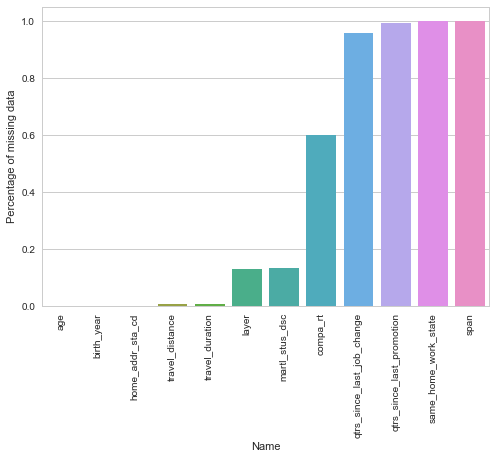

In [11]:
#visualising missing values
missing_values = missing_values.to_frame()
missing_values.columns = ['count']
missing_values.index.names = ['Name']
missing_values['Name'] = missing_values.index

#plot the missing value count
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'Name', y = 'count', data=missing_values)
plt.xticks(rotation = 90)
plt.ylabel('Percentage of missing data')
sns.plt.show()

In [12]:
# finding the rows with more than 50% values missing
sum(df.apply(lambda x: sum(x.isnull().values), axis = 1)>len(df.columns)/2)

0

No row is missing more than 50% data but more than 90% of data is missing in following columns so removing them from the data 
1. qtrs_since_last_job_change
2. qtrs_since_last_promotion
3. same_home_work_state
4. span

## Observing the class balance

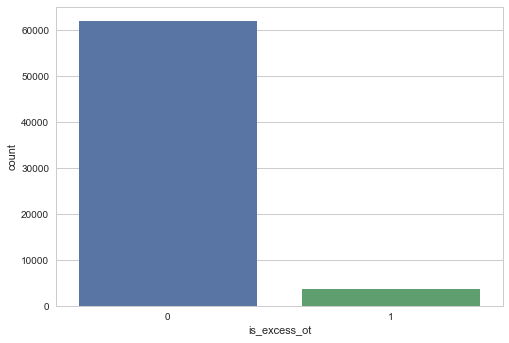

In [13]:
sns.countplot(df.is_excess_ot)

## Handling missing data

In [14]:
df.drop(['qtrs_since_last_job_change','qtrs_since_last_promotion','same_home_work_state','span'],axis=1, inplace=True)

In [15]:
df.columns

Index([u'clnt_obj_id', u'pers_obj_id', u'mnth_cd', u'mngr_pers_obj_id',
       u'job_cd', u'work_loc_cd', u'hr_orgn_id', u'hr_annl_cmpn_amt',
       u'compa_rt', u'annual_comp_by_exp', u'annual_comp_by_tenure',
       u'exp_by_tenure', u'clnt_bm_annl_cmpn', u'full_tm_eqv_val',
       u'work_asgnmt_stus_dsc', u'full_tm_part_tm_dsc', u'reg_temp_dsc',
       u'adp_lens_cd', u'hr_cmpn_freq_dsc', u'pay_rt_type_dsc',
       u'martl_stus_dsc', u'is_manager', u'flsa_stus_dsc', u'home_addr_sta_cd',
       u'work_state_cd', u'age', u'birth_year', u'salary_hike',
       u'earnings_hike', u'tenure_months', u'tenure_in_job_months',
       u'tenure_in_cmpn_months', u'travel_distance', u'travel_duration',
       u'c_age_band_1', u'c_age_band_2', u'c_age_band_3', u'c_age_band_4',
       u'c_age_band_5', u'c_age_band_6', u'c_age_band_7', u'c_tenure_band_1',
       u'c_tenure_band_2', u'c_tenure_band_3', u'c_tenure_band_4',
       u'c_tenure_band_5', u'c_tenure_band_6', u'c_traditionalists',
       u'c_

employee records with overtime are quite less than the employees with non overtime. Hence, this is a class imbalance problem

In [16]:
df.martl_stus_dsc.unique()

array([u'MARRIED', u'SINGLE', nan, u'DIVORCED', u'WIDOWED'], dtype=object)

In [17]:
df.martl_stus_dsc.fillna('UNKNOWN',inplace=True)

#### Assuming the marital status of employee as UNKNOWN for NULL

In [18]:
df.martl_stus_dsc.unique()

array([u'MARRIED', u'SINGLE', 'UNKNOWN', u'DIVORCED', u'WIDOWED'], dtype=object)

#### Replacing the missing values of travel distance and travel duration with their mean values

In [19]:
df.travel_distance.fillna(df.travel_distance.mean(),inplace=True)

In [20]:
df.travel_duration.fillna(df.travel_duration.mean(),inplace=True)

#### Assuming that employee with no age and birth year are born between 1925 and 1945 

In [21]:
df.birth_year.fillna(1935,inplace=True)

In [22]:
df.age.fillna(83,inplace=True)

#### Replacing the missing home_addr_sta_cd value as 'MA' as it is the most common value

In [23]:
df.home_addr_sta_cd.mode()

0    MA
dtype: object

In [24]:
df.home_addr_sta_cd.fillna('MA',inplace=True)

#### Replacing the missing value of layer with mean

In [25]:
df.layer.unique()

array([  3.,   2.,   4.,   5.,   1.,  nan,   6.,   7.,   8.])

In [26]:
df.layer.fillna(df.layer.mean(),inplace=True)

#### Replacing the missing value of compa_rt with mean

In [27]:
df.compa_rt.fillna(df.compa_rt.mean(),inplace=True)

#### Checking for the missing values again

In [28]:
df.columns[df.isnull().any()]

Index([], dtype='object')

There are no more missing values in the data

## Data Analysis

### Analyzing the full time/part time job status with overtime

In [29]:
pivot = df.pivot_table(index='full_tm_part_tm_dsc', values='is_excess_ot', aggfunc=np.count_nonzero)
pivot

,is_excess_ot
full_tm_part_tm_dsc,
FULL_TIME,3636
PART_TIME,32


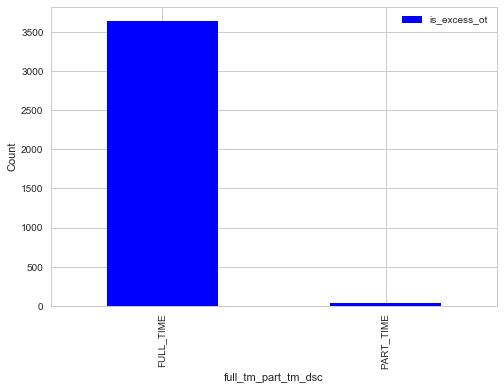

In [30]:
pivot.plot(kind='bar', color='blue')
plt.ylabel("Count")

From the data it looks like full time employees are doing more overtime than part time

### Analyzing the regular/temporay job status with overtime

In [31]:
pivot = df.pivot_table(index='reg_temp_dsc', values='is_excess_ot', aggfunc=np.count_nonzero)
pivot

,is_excess_ot
reg_temp_dsc,
REGULAR,3664
TEMPORARY,4


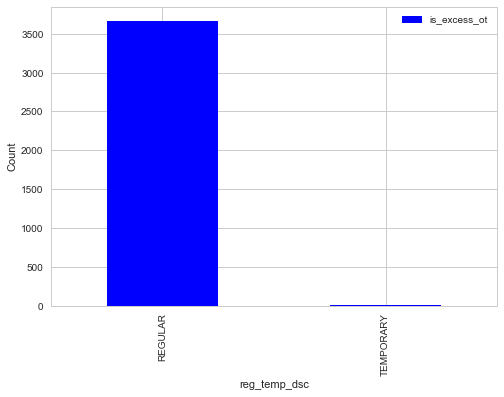

In [32]:
pivot.plot(kind='bar', color='blue')
plt.ylabel("Count")

From the data it looks like regular employees are working overtime more often

### analyzing compensation frequency with overtime

In [33]:
pivot = df.pivot_table(index='hr_cmpn_freq_dsc', values='is_excess_ot', aggfunc=np.count_nonzero)
pivot

,is_excess_ot
hr_cmpn_freq_dsc,
Annual,4
Biweekly,624
Hourly,3037
Weekly,3


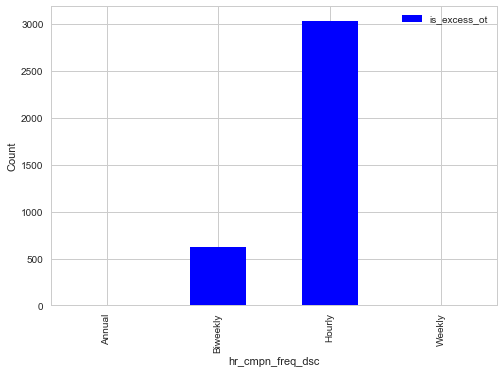

In [34]:
pivot.plot(kind='bar', color='blue')
plt.ylabel("Count")

From the data it looks like employees are paid hourly are doing more overtime than others

### Analyzing payrate with overtime

In [35]:
pivot = df.pivot_table(index='pay_rt_type_dsc', values='is_excess_ot', aggfunc=np.count_nonzero)
pivot

,is_excess_ot
pay_rt_type_dsc,
Hourly,3667
Salaried,1


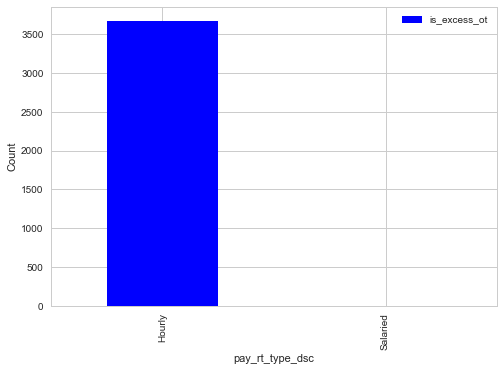

In [36]:
pivot.plot(kind='bar', color='blue')
plt.ylabel("Count")

Only one salaried employee is doing overtime

### How marital status is effecting overtime?

In [37]:
pivot = df.pivot_table(index='martl_stus_dsc', values='is_excess_ot', aggfunc=np.count_nonzero)
pivot

,is_excess_ot
martl_stus_dsc,
DIVORCED,13
MARRIED,2480
SINGLE,1141
UNKNOWN,26
WIDOWED,8


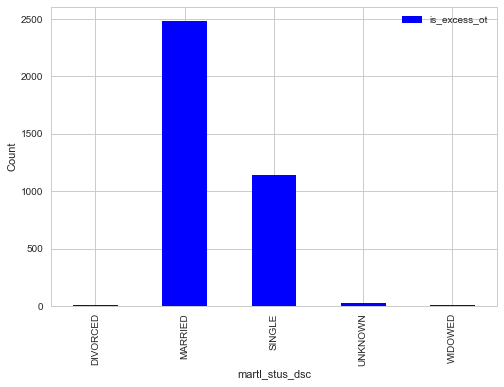

In [38]:
pivot.plot(kind='bar', color='blue')
plt.ylabel("Count")

Surprisingly married people who like to spend more time with their family are doing more overtime

### Are managers working hard?

In [39]:
pivot = df.pivot_table(index='is_manager', values='is_excess_ot', aggfunc=np.count_nonzero)
pivot

,is_excess_ot
is_manager,
MANAGER,1200
NON_MANAGER,2468


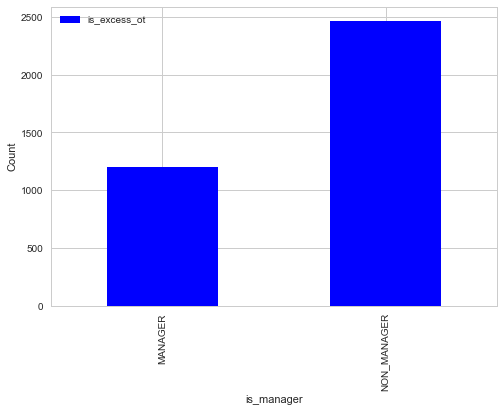

In [40]:
pivot.plot(kind='bar', color='blue')
plt.ylabel("Count")

### How exempt from payment is effecting overtime

In [41]:
pivot = df.pivot_table(index='flsa_stus_dsc', values='is_excess_ot', aggfunc=np.count_nonzero)
pivot

,is_excess_ot
flsa_stus_dsc,
EXEMPT,2596
NONEXEMPT,1072


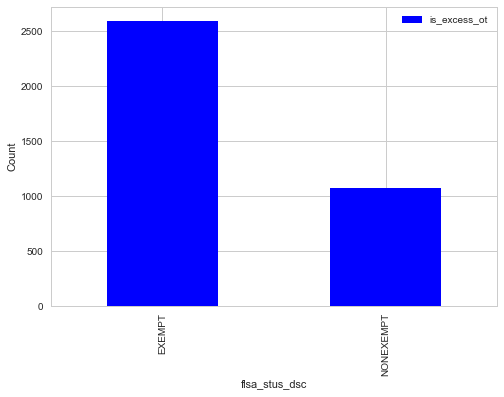

In [42]:
pivot.plot(kind='bar', color='blue')
plt.ylabel("Count")

Suprisingly employees who are exempted from overtime payment are doing more overtime

### Analyzing how the place they live are effecting overtime

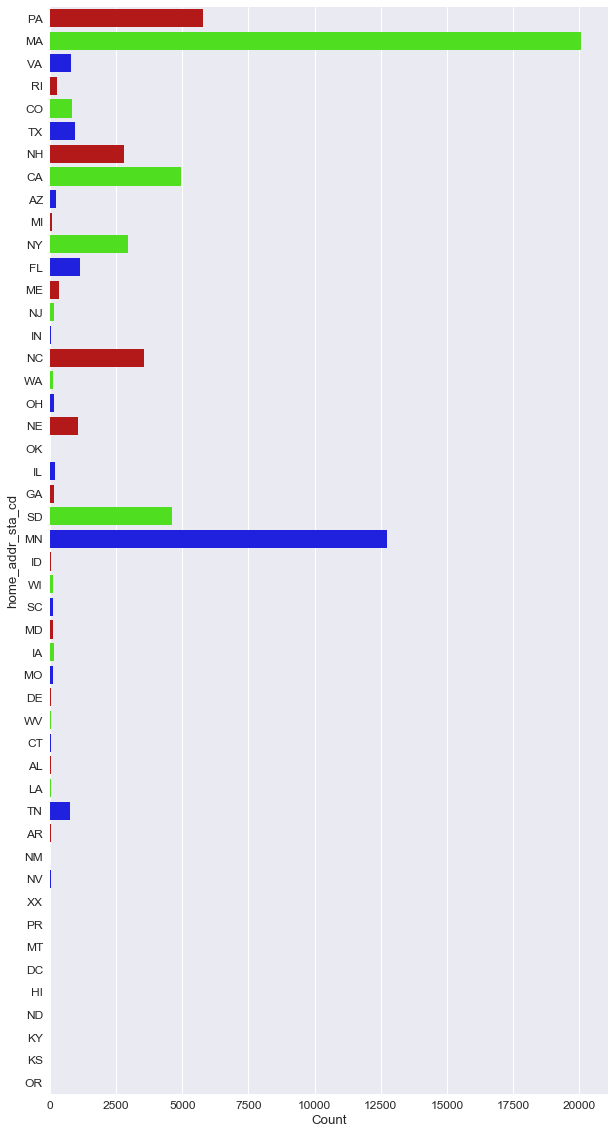

In [43]:
sns.set_style('whitegrid')
sns.set(font_scale=1.2)
plt.rcParams['figure.figsize'] = (10,20)
df_hra_colors = pd.DataFrame({'hra': ['red', 'green', 'blue'],'hex': ['#cc0000', '#40ff00', '#0000ff']})
#thickness = [1, 2, 3]
#thick_sum = sum(thickness)
#df_hra_colors['thickness'] = thickness
ax = sns.countplot(y='home_addr_sta_cd', data=df,
                     palette=df_hra_colors['hex'].tolist())
#plt.xlim(0, max(thickness) + 30)
ax.set_xlabel("Count")
ax.set_ylabel("home_addr_sta_cd")
    #ax.set_title("What an Awesome Plot!")
#for i, p in enumerate(ax.patches):
#    ax.annotate("%.2f (%.2f)%%" % (p.get_width(), thickness[i] / thick_sum * 100.0),(p.get_x() + p.get_width(), p.get_y() + 1),xytext=(5, 10), textcoords='offset points')
plt.show()

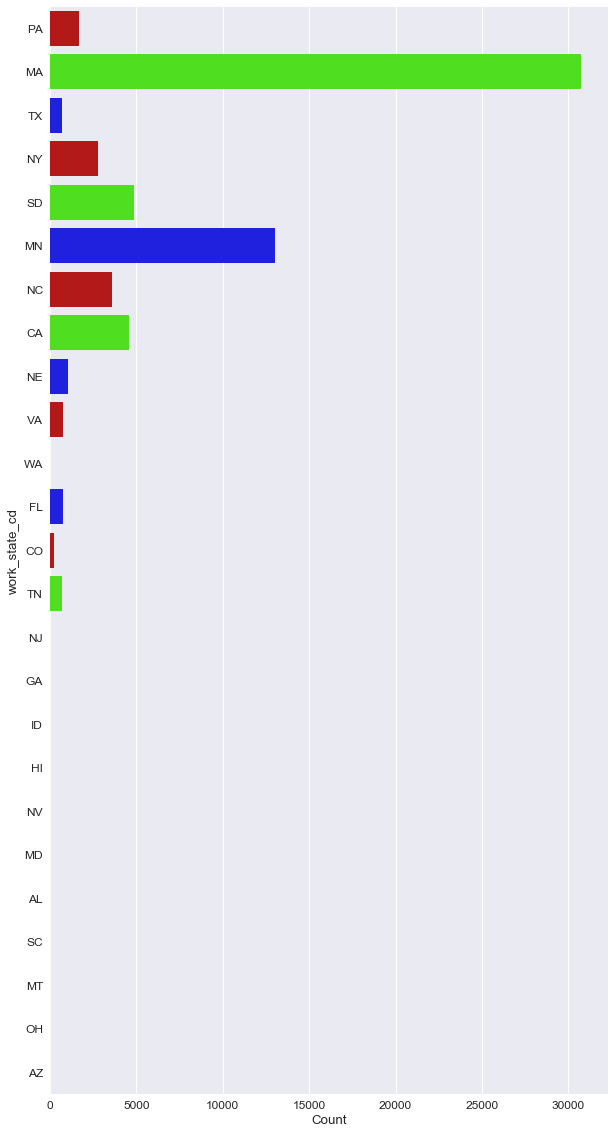

In [44]:
sns.set_style('whitegrid')
sns.set(font_scale=1.2)
plt.rcParams['figure.figsize'] = (10,20)
df_hra_colors = pd.DataFrame({'hra': ['red', 'green', 'blue'],'hex': ['#cc0000', '#40ff00', '#0000ff']})
#thickness = [1, 2, 3]
#thick_sum = sum(thickness)
#df_hra_colors['thickness'] = thickness
ax = sns.countplot(y='work_state_cd', data=df,
                     palette=df_hra_colors['hex'].tolist())
#plt.xlim(0, max(thickness) + 30)
ax.set_xlabel("Count")
ax.set_ylabel("work_state_cd")
    #ax.set_title("What an Awesome Plot!")
#for i, p in enumerate(ax.patches):
#    ax.annotate("%.2f (%.2f)%%" % (p.get_width(), thickness[i] / thick_sum * 100.0),(p.get_x() + p.get_width(), p.get_y() + 1),xytext=(5, 10), textcoords='offset points')
plt.show()

### Preprocessing of data

In [45]:
df.columns

Index([u'clnt_obj_id', u'pers_obj_id', u'mnth_cd', u'mngr_pers_obj_id',
       u'job_cd', u'work_loc_cd', u'hr_orgn_id', u'hr_annl_cmpn_amt',
       u'compa_rt', u'annual_comp_by_exp', u'annual_comp_by_tenure',
       u'exp_by_tenure', u'clnt_bm_annl_cmpn', u'full_tm_eqv_val',
       u'work_asgnmt_stus_dsc', u'full_tm_part_tm_dsc', u'reg_temp_dsc',
       u'adp_lens_cd', u'hr_cmpn_freq_dsc', u'pay_rt_type_dsc',
       u'martl_stus_dsc', u'is_manager', u'flsa_stus_dsc', u'home_addr_sta_cd',
       u'work_state_cd', u'age', u'birth_year', u'salary_hike',
       u'earnings_hike', u'tenure_months', u'tenure_in_job_months',
       u'tenure_in_cmpn_months', u'travel_distance', u'travel_duration',
       u'c_age_band_1', u'c_age_band_2', u'c_age_band_3', u'c_age_band_4',
       u'c_age_band_5', u'c_age_band_6', u'c_age_band_7', u'c_tenure_band_1',
       u'c_tenure_band_2', u'c_tenure_band_3', u'c_tenure_band_4',
       u'c_tenure_band_5', u'c_tenure_band_6', u'c_traditionalists',
       u'c_

In [46]:
data=df[['pers_obj_id', 'mnth_cd', 'hr_annl_cmpn_amt','compa_rt', 'annual_comp_by_exp', 'annual_comp_by_tenure',
       'exp_by_tenure', 'clnt_bm_annl_cmpn', 'full_tm_eqv_val',
       'work_asgnmt_stus_dsc', 'full_tm_part_tm_dsc', 'reg_temp_dsc',
       'adp_lens_cd', 'hr_cmpn_freq_dsc', 'pay_rt_type_dsc',
       'martl_stus_dsc', 'is_manager', 'flsa_stus_dsc', 'home_addr_sta_cd',
       'work_state_cd', 'age', 'salary_hike',
       'earnings_hike', 'tenure_months', 'tenure_in_job_months',
       'tenure_in_cmpn_months', 'travel_distance', 'travel_duration',
       'c_num_work_states', 'c_perc_tenured', 'layer',
       'direct_reports', 'indirect_reports', 'total_reports',
       'regular_hours_autopay', 'l2_code', 'is_excess_ot']]

In [47]:
data.columns

Index([u'pers_obj_id', u'mnth_cd', u'hr_annl_cmpn_amt', u'compa_rt',
       u'annual_comp_by_exp', u'annual_comp_by_tenure', u'exp_by_tenure',
       u'clnt_bm_annl_cmpn', u'full_tm_eqv_val', u'work_asgnmt_stus_dsc',
       u'full_tm_part_tm_dsc', u'reg_temp_dsc', u'adp_lens_cd',
       u'hr_cmpn_freq_dsc', u'pay_rt_type_dsc', u'martl_stus_dsc',
       u'is_manager', u'flsa_stus_dsc', u'home_addr_sta_cd', u'work_state_cd',
       u'age', u'salary_hike', u'earnings_hike', u'tenure_months',
       u'tenure_in_job_months', u'tenure_in_cmpn_months', u'travel_distance',
       u'travel_duration', u'c_num_work_states', u'c_perc_tenured', u'layer',
       u'direct_reports', u'indirect_reports', u'total_reports',
       u'regular_hours_autopay', u'l2_code', u'is_excess_ot'],
      dtype='object')

In [48]:
data.dtypes

pers_obj_id               object
mnth_cd                    int64
hr_annl_cmpn_amt           int64
compa_rt                 float64
annual_comp_by_exp       float64
annual_comp_by_tenure    float64
exp_by_tenure            float64
clnt_bm_annl_cmpn        float64
full_tm_eqv_val          float64
work_asgnmt_stus_dsc      object
full_tm_part_tm_dsc       object
reg_temp_dsc              object
adp_lens_cd               object
hr_cmpn_freq_dsc          object
pay_rt_type_dsc           object
martl_stus_dsc            object
is_manager                object
flsa_stus_dsc             object
home_addr_sta_cd          object
work_state_cd             object
age                      float64
salary_hike              float64
earnings_hike            float64
tenure_months              int64
tenure_in_job_months       int64
tenure_in_cmpn_months      int64
travel_distance          float64
travel_duration          float64
c_num_work_states          int64
c_perc_tenured           float64
layer     

In [49]:
numeric_data=data.select_dtypes(include=[np.number])

In [50]:
numeric_data.columns

Index([u'mnth_cd', u'hr_annl_cmpn_amt', u'compa_rt', u'annual_comp_by_exp',
       u'annual_comp_by_tenure', u'exp_by_tenure', u'clnt_bm_annl_cmpn',
       u'full_tm_eqv_val', u'age', u'salary_hike', u'earnings_hike',
       u'tenure_months', u'tenure_in_job_months', u'tenure_in_cmpn_months',
       u'travel_distance', u'travel_duration', u'c_num_work_states',
       u'c_perc_tenured', u'layer', u'direct_reports', u'indirect_reports',
       u'total_reports', u'regular_hours_autopay', u'is_excess_ot'],
      dtype='object')

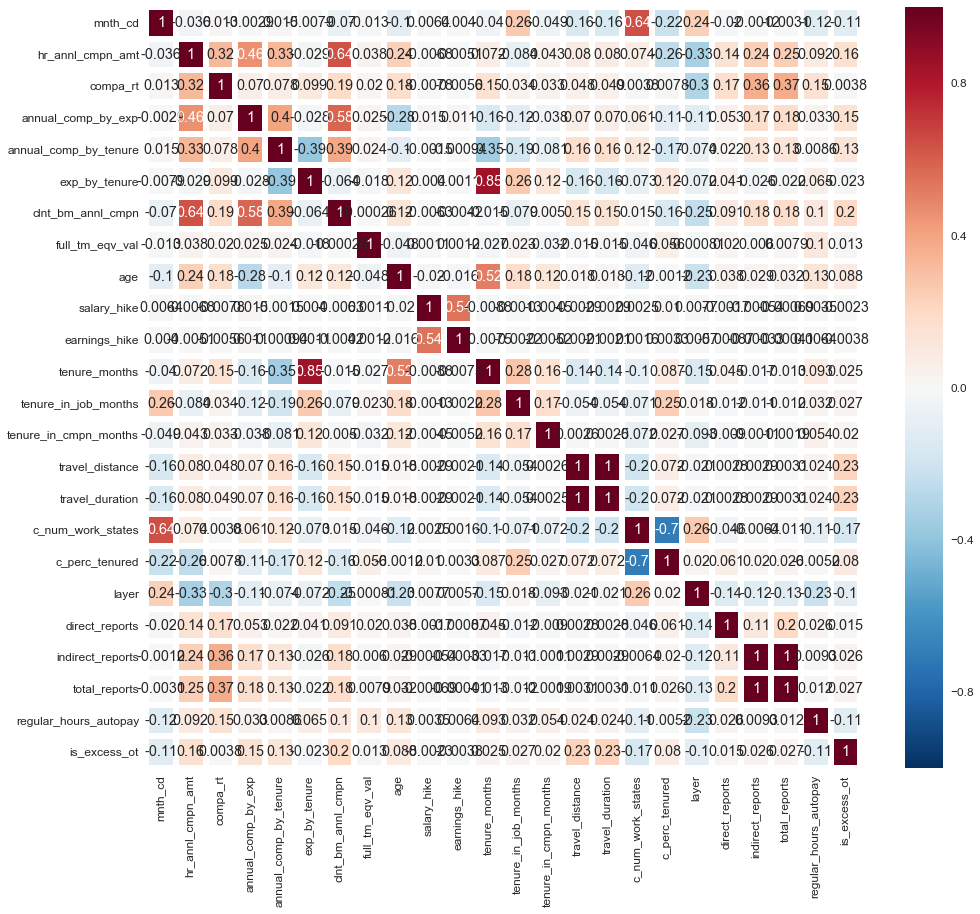

In [51]:
corr=numeric_data.corr()
plt.figure(figsize = (16,14))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,annot=True,linewidths=5)

In [52]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,mnth_cd,hr_annl_cmpn_amt,compa_rt,annual_comp_by_exp,annual_comp_by_tenure,exp_by_tenure,clnt_bm_annl_cmpn,full_tm_eqv_val,age,salary_hike,earnings_hike,tenure_months,tenure_in_job_months,tenure_in_cmpn_months,travel_distance,travel_duration,c_num_work_states,c_perc_tenured,layer,direct_reports,indirect_reports,total_reports,regular_hours_autopay,is_excess_ot
mnth_cd,1,-0.036,0.013,-0.0029,0.015,-0.0079,-0.07,-0.013,-0.1,0.0064,0.004,-0.04,0.26,-0.049,-0.16,-0.16,0.64,-0.22,0.24,-0.02,-0.0012,-0.0031,-0.12,-0.11
hr_annl_cmpn_amt,-0.036,1,0.32,0.46,0.33,-0.029,0.64,0.038,0.24,-0.0068,-0.0051,0.072,-0.084,0.043,0.08,0.08,0.074,-0.26,-0.33,0.14,0.24,0.25,0.092,0.16
compa_rt,0.013,0.32,1,0.07,0.078,0.099,0.19,0.02,0.18,-0.0078,-0.0056,0.15,0.034,0.033,0.048,0.049,0.0038,0.0078,-0.3,0.17,0.36,0.37,0.15,0.0038
annual_comp_by_exp,-0.0029,0.46,0.07,1,0.4,-0.028,0.58,0.025,-0.28,0.015,0.011,-0.16,-0.12,-0.038,0.07,0.07,0.061,-0.11,-0.11,0.053,0.17,0.18,0.033,0.15
annual_comp_by_tenure,0.015,0.33,0.078,0.4,1,-0.39,0.39,0.024,-0.1,-0.0015,-0.00094,-0.35,-0.19,-0.081,0.16,0.16,0.12,-0.17,-0.074,0.022,0.13,0.13,0.0086,0.13
exp_by_tenure,-0.0079,-0.029,0.099,-0.028,-0.39,1,-0.064,-0.018,0.12,0.004,0.0011,0.85,0.26,0.12,-0.16,-0.16,-0.073,0.12,-0.072,0.041,-0.026,-0.022,0.065,-0.023
clnt_bm_annl_cmpn,-0.07,0.64,0.19,0.58,0.39,-0.064,1,-0.00026,0.12,-0.0063,-0.0042,-0.015,-0.079,0.005,0.15,0.15,0.015,-0.16,-0.25,0.091,0.18,0.18,0.1,0.2
full_tm_eqv_val,-0.013,0.038,0.02,0.025,0.024,-0.018,-0.00026,1,-0.048,0.0011,0.0012,-0.027,0.023,-0.032,-0.015,-0.015,-0.046,0.056,-0.00081,0.02,0.006,0.0079,0.1,0.013
age,-0.1,0.24,0.18,-0.28,-0.1,0.12,0.12,-0.048,1,-0.02,-0.016,0.52,0.18,0.12,0.018,0.018,-0.12,-0.0012,-0.23,0.038,0.029,0.032,0.13,0.088
salary_hike,0.0064,-0.0068,-0.0078,0.015,-0.0015,0.004,-0.0063,0.0011,-0.02,1,0.54,-0.0088,-0.0013,-0.0045,-0.0029,-0.0029,0.0025,0.01,0.0077,-0.0017,-0.00054,-0.00069,0.0035,-0.0023


In [53]:
print (corr['is_excess_ot'].sort_values(ascending=False)[:10], '\n') #top 15 values
print ('----------------------')
print (corr['is_excess_ot'].sort_values(ascending=False)[-15:]) #last 5 values

(is_excess_ot             1.000000
travel_duration          0.226940
travel_distance          0.226935
clnt_bm_annl_cmpn        0.195781
hr_annl_cmpn_amt         0.158188
annual_comp_by_exp       0.145131
annual_comp_by_tenure    0.126855
age                      0.087801
c_perc_tenured           0.079637
tenure_in_job_months     0.027404
Name: is_excess_ot, dtype: float64, '\n')
----------------------
tenure_in_job_months     0.027404
total_reports            0.027201
indirect_reports         0.026143
tenure_months            0.024627
tenure_in_cmpn_months    0.019546
direct_reports           0.015072
full_tm_eqv_val          0.012710
compa_rt                 0.003763
salary_hike             -0.002253
earnings_hike           -0.003804
exp_by_tenure           -0.023155
layer                   -0.103855
mnth_cd                 -0.111335
regular_hours_autopay   -0.113348
c_num_work_states       -0.171148
Name: is_excess_ot, dtype: float64


In [54]:
print (corr['is_excess_ot'].sort_values(ascending=False) > 0)

is_excess_ot              True
travel_duration           True
travel_distance           True
clnt_bm_annl_cmpn         True
hr_annl_cmpn_amt          True
annual_comp_by_exp        True
annual_comp_by_tenure     True
age                       True
c_perc_tenured            True
tenure_in_job_months      True
total_reports             True
indirect_reports          True
tenure_months             True
tenure_in_cmpn_months     True
direct_reports            True
full_tm_eqv_val           True
compa_rt                  True
salary_hike              False
earnings_hike            False
exp_by_tenure            False
layer                    False
mnth_cd                  False
regular_hours_autopay    False
c_num_work_states        False
Name: is_excess_ot, dtype: bool


In [55]:
final_data=df[['travel_duration','travel_distance','clnt_bm_annl_cmpn','hr_annl_cmpn_amt','annual_comp_by_exp','annual_comp_by_tenure','layer','mnth_cd','regular_hours_autopay','c_num_work_states','age','is_excess_ot']]

In [56]:
final_data.columns

Index([u'travel_duration', u'travel_distance', u'clnt_bm_annl_cmpn',
       u'hr_annl_cmpn_amt', u'annual_comp_by_exp', u'annual_comp_by_tenure',
       u'layer', u'mnth_cd', u'regular_hours_autopay', u'c_num_work_states',
       u'age', u'is_excess_ot'],
      dtype='object')

In [57]:
final_data.columns[final_data.isnull().any()]

Index([], dtype='object')

In [58]:
final_data.dtypes

travel_duration          float64
travel_distance          float64
clnt_bm_annl_cmpn        float64
hr_annl_cmpn_amt           int64
annual_comp_by_exp       float64
annual_comp_by_tenure    float64
layer                    float64
mnth_cd                    int64
regular_hours_autopay    float64
c_num_work_states          int64
age                      float64
is_excess_ot               int64
dtype: object

In [59]:
list=[]
for age in final_data.age:
    if age > 93:
        list.append(1)
    elif age <93 and age > 54:
        list.append(2)
    elif age < 54 and age > 39:
        list.append(3)
    elif age < 39 and age > 31:
        list.append(4)
    elif age < 31 and age > 24:
        list.append(5)
    elif age < 24 and age > 5:
        list.append(6)
    else:
        list.append(7)
final_data['ageband']=list

In [60]:
final_data.ageband.unique()

array([3, 2, 5, 4, 7, 6], dtype=int64)

In [61]:
final_data.columns

Index([      u'travel_duration',       u'travel_distance',
           u'clnt_bm_annl_cmpn',      u'hr_annl_cmpn_amt',
          u'annual_comp_by_exp', u'annual_comp_by_tenure',
                       u'layer',               u'mnth_cd',
       u'regular_hours_autopay',     u'c_num_work_states',
                         u'age',          u'is_excess_ot',
                     u'ageband'],
      dtype='object')

In [62]:
final_data.drop('age',inplace=True,axis=1)

In [63]:
final_data.columns[final_data.isnull().any()]

Index([], dtype='object')

In [64]:
final_data.columns

Index([      u'travel_duration',       u'travel_distance',
           u'clnt_bm_annl_cmpn',      u'hr_annl_cmpn_amt',
          u'annual_comp_by_exp', u'annual_comp_by_tenure',
                       u'layer',               u'mnth_cd',
       u'regular_hours_autopay',     u'c_num_work_states',
                u'is_excess_ot',               u'ageband'],
      dtype='object')

In [65]:
final_data.columns[final_data.isnull().any()]

Index([], dtype='object')

In [66]:
final_data.dtypes

travel_duration          float64
travel_distance          float64
clnt_bm_annl_cmpn        float64
hr_annl_cmpn_amt           int64
annual_comp_by_exp       float64
annual_comp_by_tenure    float64
layer                    float64
mnth_cd                    int64
regular_hours_autopay    float64
c_num_work_states          int64
is_excess_ot               int64
ageband                    int64
dtype: object

In [67]:
df1= df[['pers_obj_id','mnth_cd','work_asgnmt_stus_dsc','full_tm_part_tm_dsc','reg_temp_dsc','hr_cmpn_freq_dsc','pay_rt_type_dsc','martl_stus_dsc','is_manager','flsa_stus_dsc']]

In [68]:
df1.columns

Index([u'pers_obj_id', u'mnth_cd', u'work_asgnmt_stus_dsc',
       u'full_tm_part_tm_dsc', u'reg_temp_dsc', u'hr_cmpn_freq_dsc',
       u'pay_rt_type_dsc', u'martl_stus_dsc', u'is_manager', u'flsa_stus_dsc'],
      dtype='object')

In [69]:
final_data=pd.concat([final_data, df1], axis=1)

In [70]:
final_data.columns

Index([      u'travel_duration',       u'travel_distance',
           u'clnt_bm_annl_cmpn',      u'hr_annl_cmpn_amt',
          u'annual_comp_by_exp', u'annual_comp_by_tenure',
                       u'layer',               u'mnth_cd',
       u'regular_hours_autopay',     u'c_num_work_states',
                u'is_excess_ot',               u'ageband',
                 u'pers_obj_id',               u'mnth_cd',
        u'work_asgnmt_stus_dsc',   u'full_tm_part_tm_dsc',
                u'reg_temp_dsc',      u'hr_cmpn_freq_dsc',
             u'pay_rt_type_dsc',        u'martl_stus_dsc',
                  u'is_manager',         u'flsa_stus_dsc'],
      dtype='object')

In [71]:
final_data['work_asgnmt_stus_dsc']=pd.get_dummies(final_data['work_asgnmt_stus_dsc'])

In [72]:
final_data['full_tm_part_tm_dsc']=pd.get_dummies(final_data['full_tm_part_tm_dsc'])

In [73]:
final_data['reg_temp_dsc']=pd.get_dummies(final_data['reg_temp_dsc'])

In [74]:
final_data['hr_cmpn_freq_dsc']=pd.get_dummies(final_data['hr_cmpn_freq_dsc'])

In [75]:
final_data['pay_rt_type_dsc']=pd.get_dummies(final_data['pay_rt_type_dsc'])

In [76]:
final_data['martl_stus_dsc']=pd.get_dummies(final_data['martl_stus_dsc'])

In [77]:
final_data['is_manager']=pd.get_dummies(final_data['is_manager'])

In [78]:
final_data['flsa_stus_dsc']=pd.get_dummies(final_data['flsa_stus_dsc'])

In [79]:
final_data.columns[final_data.isnull().any()]

Index([], dtype='object')

In [80]:
X=final_data.ix[:,final_data.columns != 'is_excess_ot']

In [81]:
X.columns[X.isnull().any()]

Index([], dtype='object')

In [82]:
y=final_data.is_excess_ot

### Training and test data split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [84]:
from sklearn.preprocessing import StandardScaler

In [85]:
X_train.columns

Index([      u'travel_duration',       u'travel_distance',
           u'clnt_bm_annl_cmpn',      u'hr_annl_cmpn_amt',
          u'annual_comp_by_exp', u'annual_comp_by_tenure',
                       u'layer',               u'mnth_cd',
       u'regular_hours_autopay',     u'c_num_work_states',
                     u'ageband',           u'pers_obj_id',
                     u'mnth_cd',  u'work_asgnmt_stus_dsc',
         u'full_tm_part_tm_dsc',          u'reg_temp_dsc',
            u'hr_cmpn_freq_dsc',       u'pay_rt_type_dsc',
              u'martl_stus_dsc',            u'is_manager',
               u'flsa_stus_dsc'],
      dtype='object')

In [86]:
X_train.dtypes

travel_duration          float64
travel_distance          float64
clnt_bm_annl_cmpn        float64
hr_annl_cmpn_amt           int64
annual_comp_by_exp       float64
annual_comp_by_tenure    float64
layer                    float64
mnth_cd                    int64
regular_hours_autopay    float64
c_num_work_states          int64
ageband                    int64
pers_obj_id               object
mnth_cd                    int64
work_asgnmt_stus_dsc       uint8
full_tm_part_tm_dsc        uint8
reg_temp_dsc               uint8
hr_cmpn_freq_dsc           uint8
pay_rt_type_dsc            uint8
martl_stus_dsc             uint8
is_manager                 uint8
flsa_stus_dsc              uint8
dtype: object

In [87]:
X_train.drop(['pers_obj_id','mnth_cd'],axis=1,inplace=True)

In [88]:
X_train.columns

Index([      u'travel_duration',       u'travel_distance',
           u'clnt_bm_annl_cmpn',      u'hr_annl_cmpn_amt',
          u'annual_comp_by_exp', u'annual_comp_by_tenure',
                       u'layer', u'regular_hours_autopay',
           u'c_num_work_states',               u'ageband',
        u'work_asgnmt_stus_dsc',   u'full_tm_part_tm_dsc',
                u'reg_temp_dsc',      u'hr_cmpn_freq_dsc',
             u'pay_rt_type_dsc',        u'martl_stus_dsc',
                  u'is_manager',         u'flsa_stus_dsc'],
      dtype='object')

In [89]:
X_train.dtypes

travel_duration          float64
travel_distance          float64
clnt_bm_annl_cmpn        float64
hr_annl_cmpn_amt           int64
annual_comp_by_exp       float64
annual_comp_by_tenure    float64
layer                    float64
regular_hours_autopay    float64
c_num_work_states          int64
ageband                    int64
work_asgnmt_stus_dsc       uint8
full_tm_part_tm_dsc        uint8
reg_temp_dsc               uint8
hr_cmpn_freq_dsc           uint8
pay_rt_type_dsc            uint8
martl_stus_dsc             uint8
is_manager                 uint8
flsa_stus_dsc              uint8
dtype: object

### Model Building

#### Apply basic random forest model wihtout any tuning

In [91]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [93]:
X_test.drop(['pers_obj_id','mnth_cd'],axis=1,inplace=True)

In [95]:
y_pred_rfc=rfc.predict(X_test)

In [96]:
acc_rf_test_raw= metrics.accuracy_score(y_test,y_pred_rfc)
acc_rf_test_raw

0.96800295926388313

In [99]:
print metrics.classification_report(y_test, y_pred_rfc)

             precision    recall  f1-score   support

          0       0.98      0.99      0.98     20437
          1       0.78      0.59      0.67      1190

avg / total       0.97      0.97      0.97     21627



[[20236   201]
 [  491   699]]


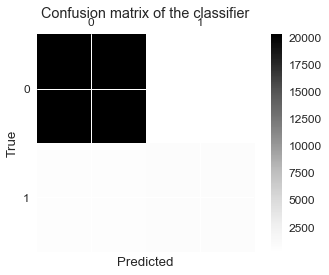

In [119]:
cm = confusion_matrix(y_test, y_pred_rfc)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### Applying mult-layer perceptron model

In [100]:
mlp=MLPClassifier()

In [101]:
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [102]:
y_pred_mlp=mlp.predict(X_test)

In [103]:
acc_mlp_test_raw= metrics.accuracy_score(y_test,y_pred_mlp)
acc_mlp_test_raw

0.9429879317519767

In [104]:
print metrics.classification_report(y_test, y_pred_mlp)

             precision    recall  f1-score   support

          0       0.96      0.98      0.97     20437
          1       0.47      0.25      0.33      1190

avg / total       0.93      0.94      0.93     21627



[[20097   340]
 [  893   297]]


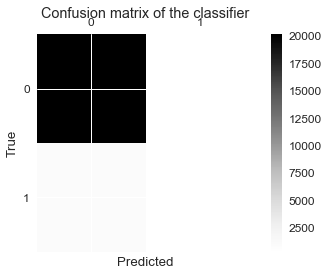

In [120]:
cm = confusion_matrix(y_test, y_pred_mlp)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### Applying gradient boosting classifier

In [105]:
gbc=GradientBoostingClassifier()

In [106]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [108]:
y_pred_gbc=gbc.predict(X_test)

In [109]:
acc_gbc_test_raw= metrics.accuracy_score(y_test,y_pred_gbc)
acc_gbc_test_raw

0.9685578212419661

In [110]:
print metrics.classification_report(y_test, y_pred_gbc)

             precision    recall  f1-score   support

          0       0.97      0.99      0.98     20437
          1       0.84      0.53      0.65      1190

avg / total       0.97      0.97      0.97     21627



[[20312   125]
 [  555   635]]


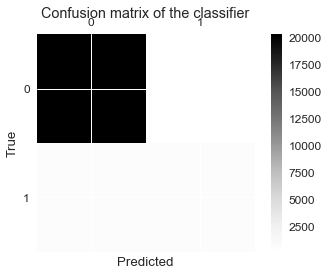

In [121]:
cm = confusion_matrix(y_test, y_pred_gbc)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### Applying SGDClassifier

In [111]:
sgc = SGDClassifier()

In [112]:
sgc.fit(X_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [113]:
y_pred_sgd = sgc.predict(X_test)

In [114]:
acc_sgc_test_raw= metrics.accuracy_score(y_test,y_pred_sgd)
acc_sgc_test_raw

0.8997086974615065

In [115]:
print metrics.classification_report(y_test, y_pred_sgd)

             precision    recall  f1-score   support

          0       0.95      0.95      0.95     20437
          1       0.10      0.11      0.11      1190

avg / total       0.90      0.90      0.90     21627



[[19328  1109]
 [ 1060   130]]


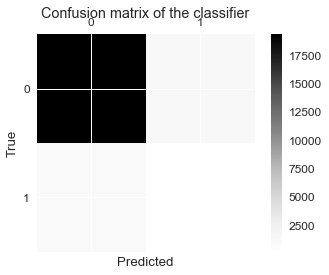

In [122]:
cm = confusion_matrix(y_test, y_pred_sgd)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### Applying KNN classifier

In [124]:
knc = KNeighborsClassifier()

In [125]:
knc.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [126]:
y_pred_knc=knc.predict(X_test)

In [127]:
acc_knc_test_raw= metrics.accuracy_score(y_test,y_pred_knc)
acc_knc_test_raw

0.94543857215517635

In [128]:
print metrics.classification_report(y_test, y_pred_knc)

             precision    recall  f1-score   support

          0       0.95      0.99      0.97     20437
          1       0.51      0.19      0.28      1190

avg / total       0.93      0.95      0.93     21627



[[20217   220]
 [  960   230]]


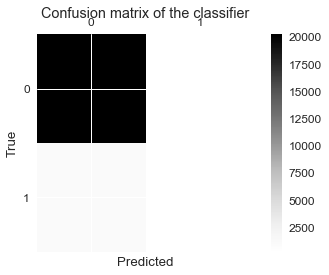

In [129]:
cm = confusion_matrix(y_test, y_pred_knc)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### From all the above Gradient bosting clissifier seems to be providing a good accuracy